In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from pandas import ExcelFile

In [5]:
df = pd.read_excel('GMD Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,43589,42419,43687,41737,5.09M,0.0395
1,2021-07-02,43443,43882,43882,43394,1.95M,-0.0033
2,2021-07-05,43394,43882,44370,42956,3.67M,-0.0011
3,2021-07-06,40371,43979,43979,40371,2.99M,-0.0697
4,2021-07-07,40859,40761,40957,38519,3.61M,0.0121


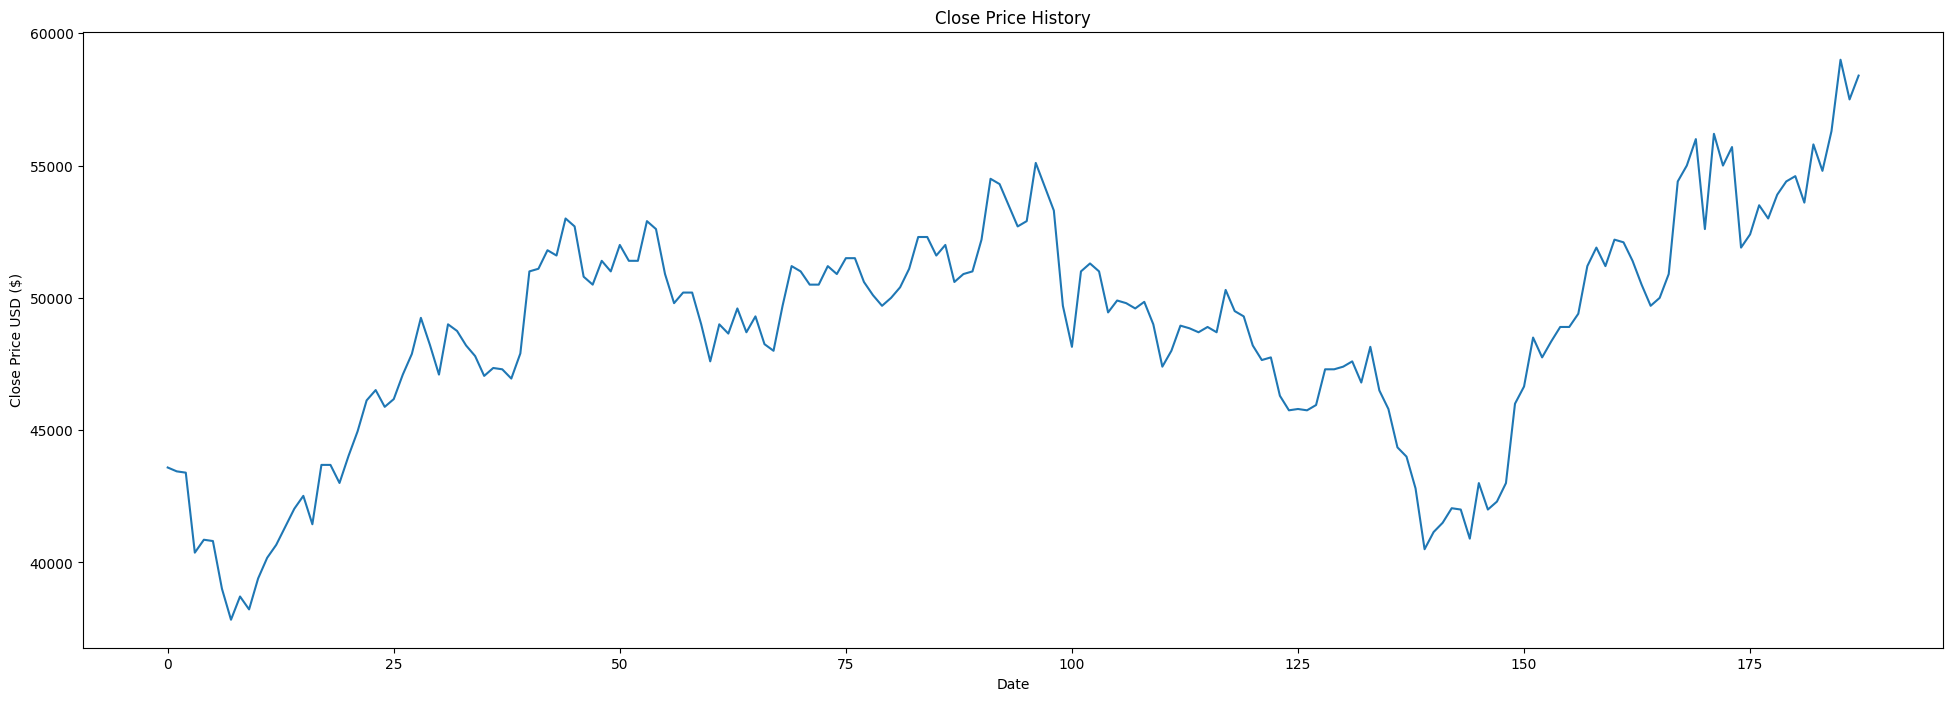

In [6]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.27182952],
       [0.26493101],
       [0.26261576],
       [0.11977887],
       [0.14283689],
       [0.14052164],
       [0.05528256],
       [0.        ],
       [0.04148554],
       [0.01842752],
       [0.07371007],
       [0.11056511],
       [0.13362313],
       [0.16589492],
       [0.19811945],
       [0.22117747],
       [0.17047817],
       [0.27646003],
       [0.27646003],
       [0.24418824],
       [0.29257229],
       [0.33637309],
       [0.39165564],
       [0.41008316],
       [0.38012663],
       [0.39397089],
       [0.43772444],
       [0.47457947],
       [0.53907579],
       [0.49069174],
       [0.43772444],
       [0.52749953],
       [0.51568702],
       [0.48969949],
       [0.47079947],
       [0.43536194],
       [0.44953695],
       [0.44717445],
       [0.43063693],
       [0.47552448],
       [0.62199962],
       [0.62672463],
       [0.65979966],
       [0.65034965],
       [0.71649972],
       [0.7023247 ],
       [0.61254961],
       [0.598

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.27182952, 0.26493101, 0.26261576, 0.11977887, 0.14283689,
       0.14052164, 0.05528256, 0.        , 0.04148554, 0.01842752,
       0.07371007, 0.11056511, 0.13362313, 0.16589492, 0.19811945,
       0.22117747, 0.17047817, 0.27646003, 0.27646003, 0.24418824,
       0.29257229, 0.33637309, 0.39165564, 0.41008316, 0.38012663,
       0.39397089, 0.43772444, 0.47457947, 0.53907579, 0.49069174,
       0.43772444, 0.52749953, 0.51568702, 0.48969949, 0.47079947,
       0.43536194, 0.44953695, 0.44717445, 0.43063693, 0.47552448,
       0.62199962, 0.62672463, 0.65979966, 0.65034965, 0.71649972,
       0.7023247 , 0.61254961, 0.5983746 , 0.64089964, 0.62199962,
       0.66924967, 0.64089964, 0.64089964, 0.71177471, 0.6975997 ,
       0.61727462, 0.56529957, 0.58419958, 0.58419958, 0.52749953])]
[0.46134946134946153]

[array([0.27182952, 0.26493101, 0.26261576, 0.11977887, 0.14283689,
       0.14052164, 0.05528256, 0.        , 0.04148554, 0.01842752,
       0.07371007, 0.11056511, 0.13

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0243
Epoch 2/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0092
Epoch 3/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0066
Epoch 4/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0077
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 6/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0069
Epoch 7/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0062
Epoch 8/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0057
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0063
Epoch 10/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 11/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0057
Epoch 12/25
66/66 [==============================] - 1s 11ms/step - loss: 0.0067
Epoch 13/25
66/66 [==================

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 15ms/step


1732.0695082403615

C:\Users\DELL\AppData\Local\Temp\ipykernel_42148\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


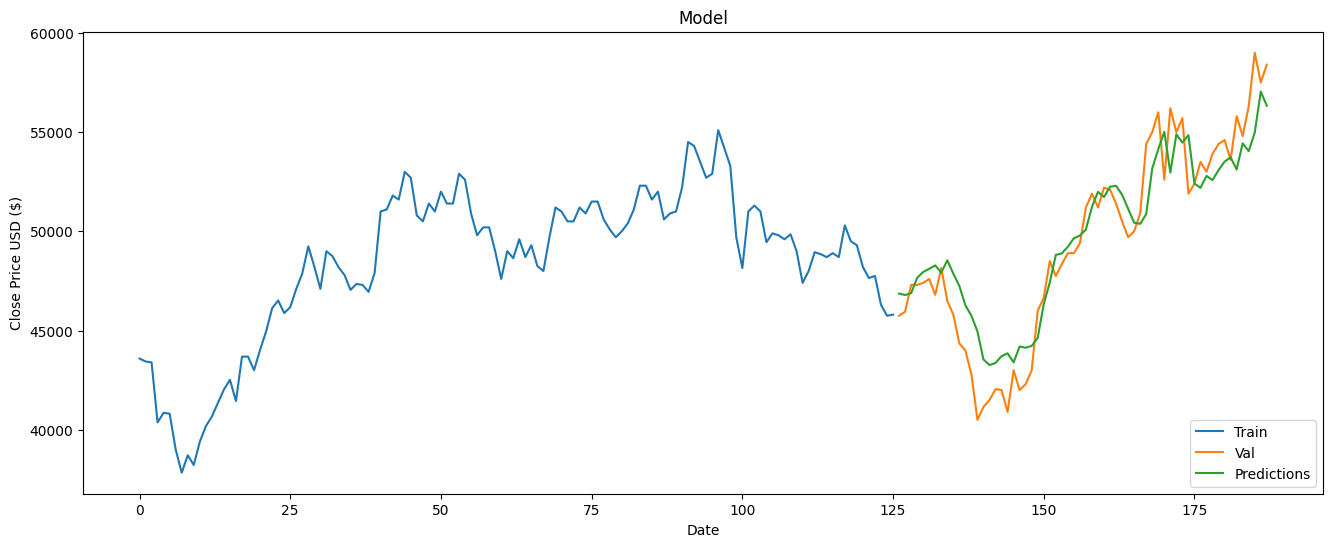

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()